MIS 382N: ADVANCED MACHINE LEARNING

Assignment 4

Total points: 75 + 5 bonus points

Due: Monday, November 2 to be submitted via Canvas by 11:59 pm

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

**Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Rishabh Tiwari

EID: RT27739

Name: Sreekar Lanka

EID: SL54387

In [349]:
from IPython.display import Image 

# Question 1: Expected Loss Minimization [10 pts]
Consider a binary classification problem with the following loss matrix -
$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & r & c  \\
   & C2 & s & 0 & c \\
  \end{array} } 
$$

where the cost of rejection is a constant, and the costs $r$ and $s$ are positive real numbers. Let $f(x)=P(C1|x)$.


**(a) [2.5 points]** Show that the expected loss when $x$ is labelled as $C_1$ is a decreasing function of $f(x)$ while expected loss when $x$ is labelled as $C_2$ is a increasing function of $f(x)$.  

**(b) [2.5 points]** For $c=0$, show that the decision which minimizes the expected loss is to reject all instances of $x$

**(c) [2.5 points]** Let $r=5$ and $s=2$, what is the minimum value of $c$ such that no instance of $x$ gets rejected (irrespective of  $f(x)$)?

**(d) [2.5 points]** Let $r=7$, $s=4$, and $c=3$. Determine the  ranges of $f(x)$ for which the optimal decision is C1, reject and C2 respectively.

### Part A)

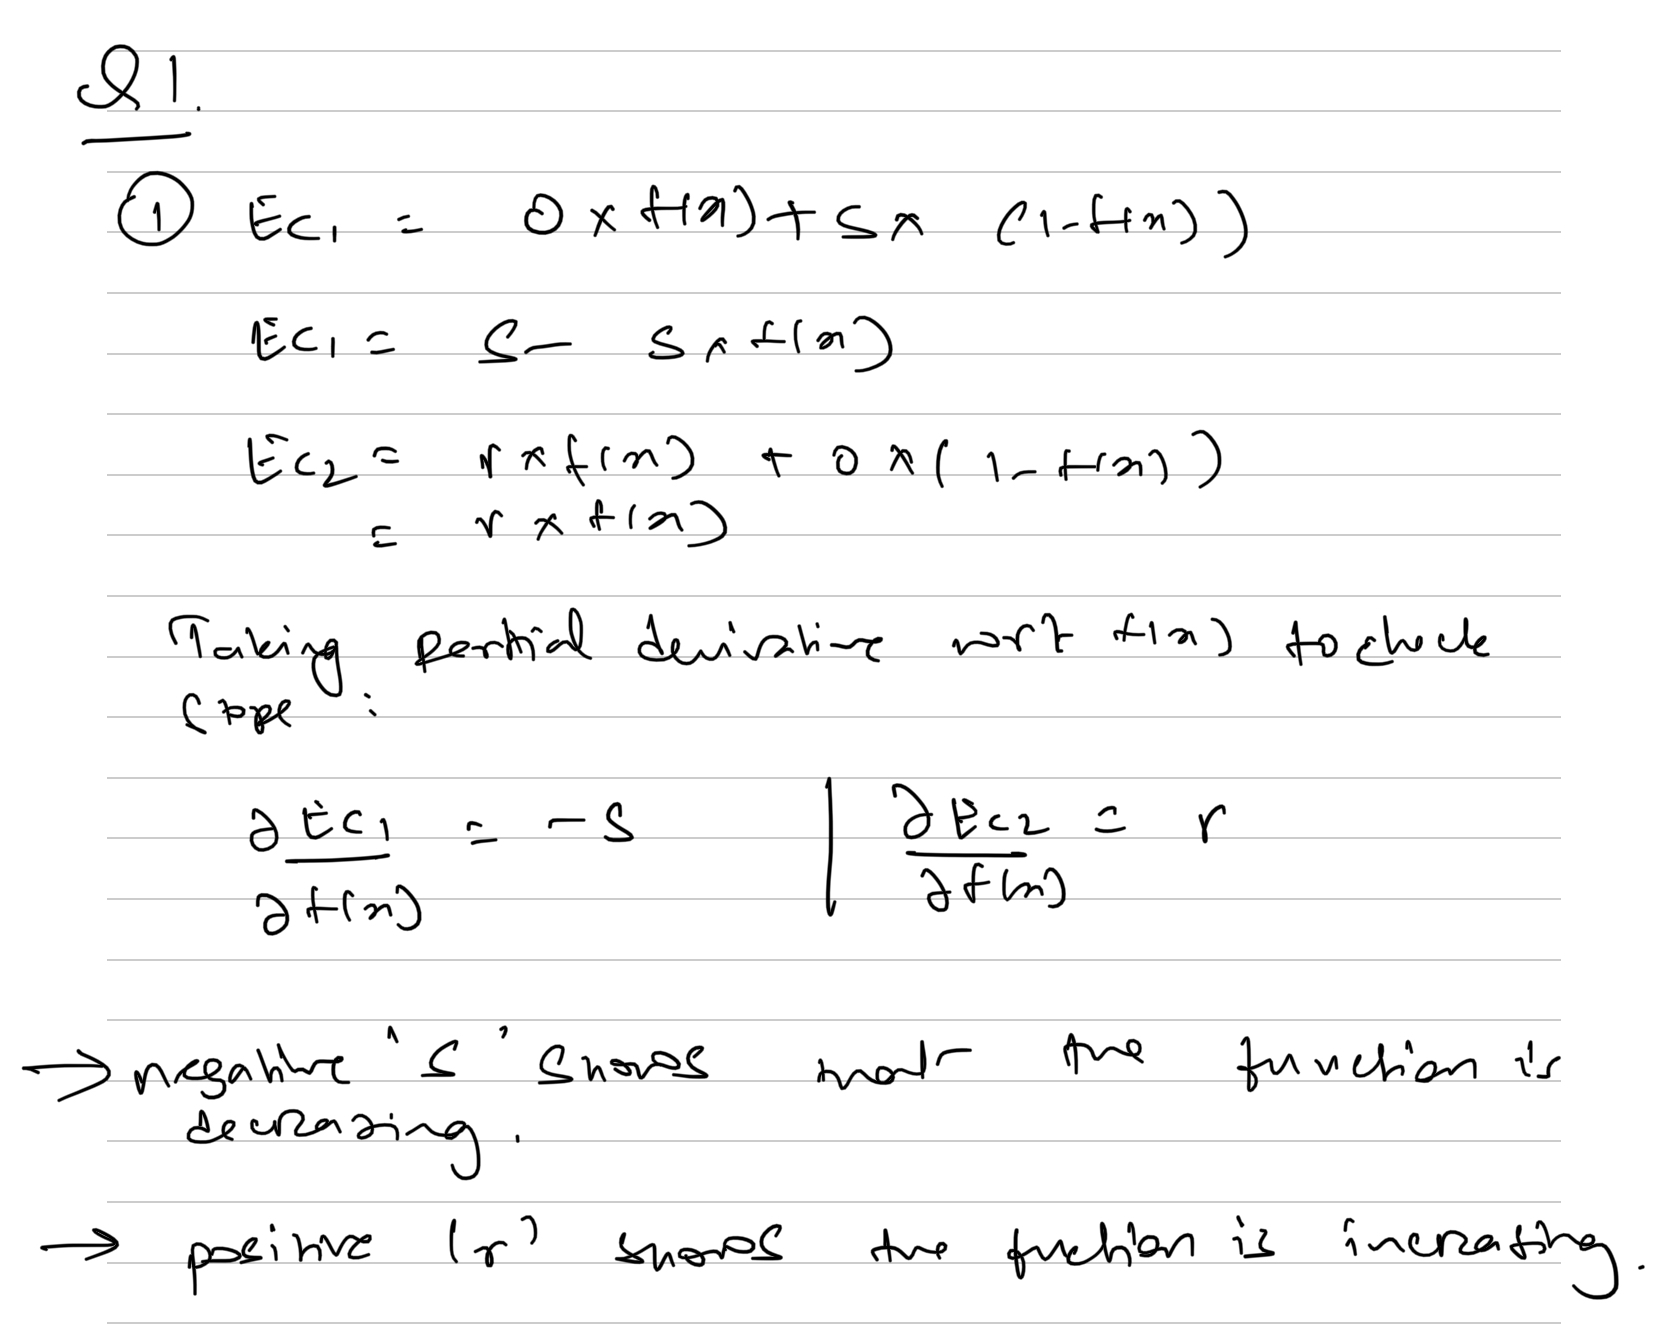

In [323]:
Image("/Users/sreekarl/Desktop/MSBA/Fall Semester/Advanced Machine Learning/Homework/HW 4/Images/Q1.1.png")

### Part B)

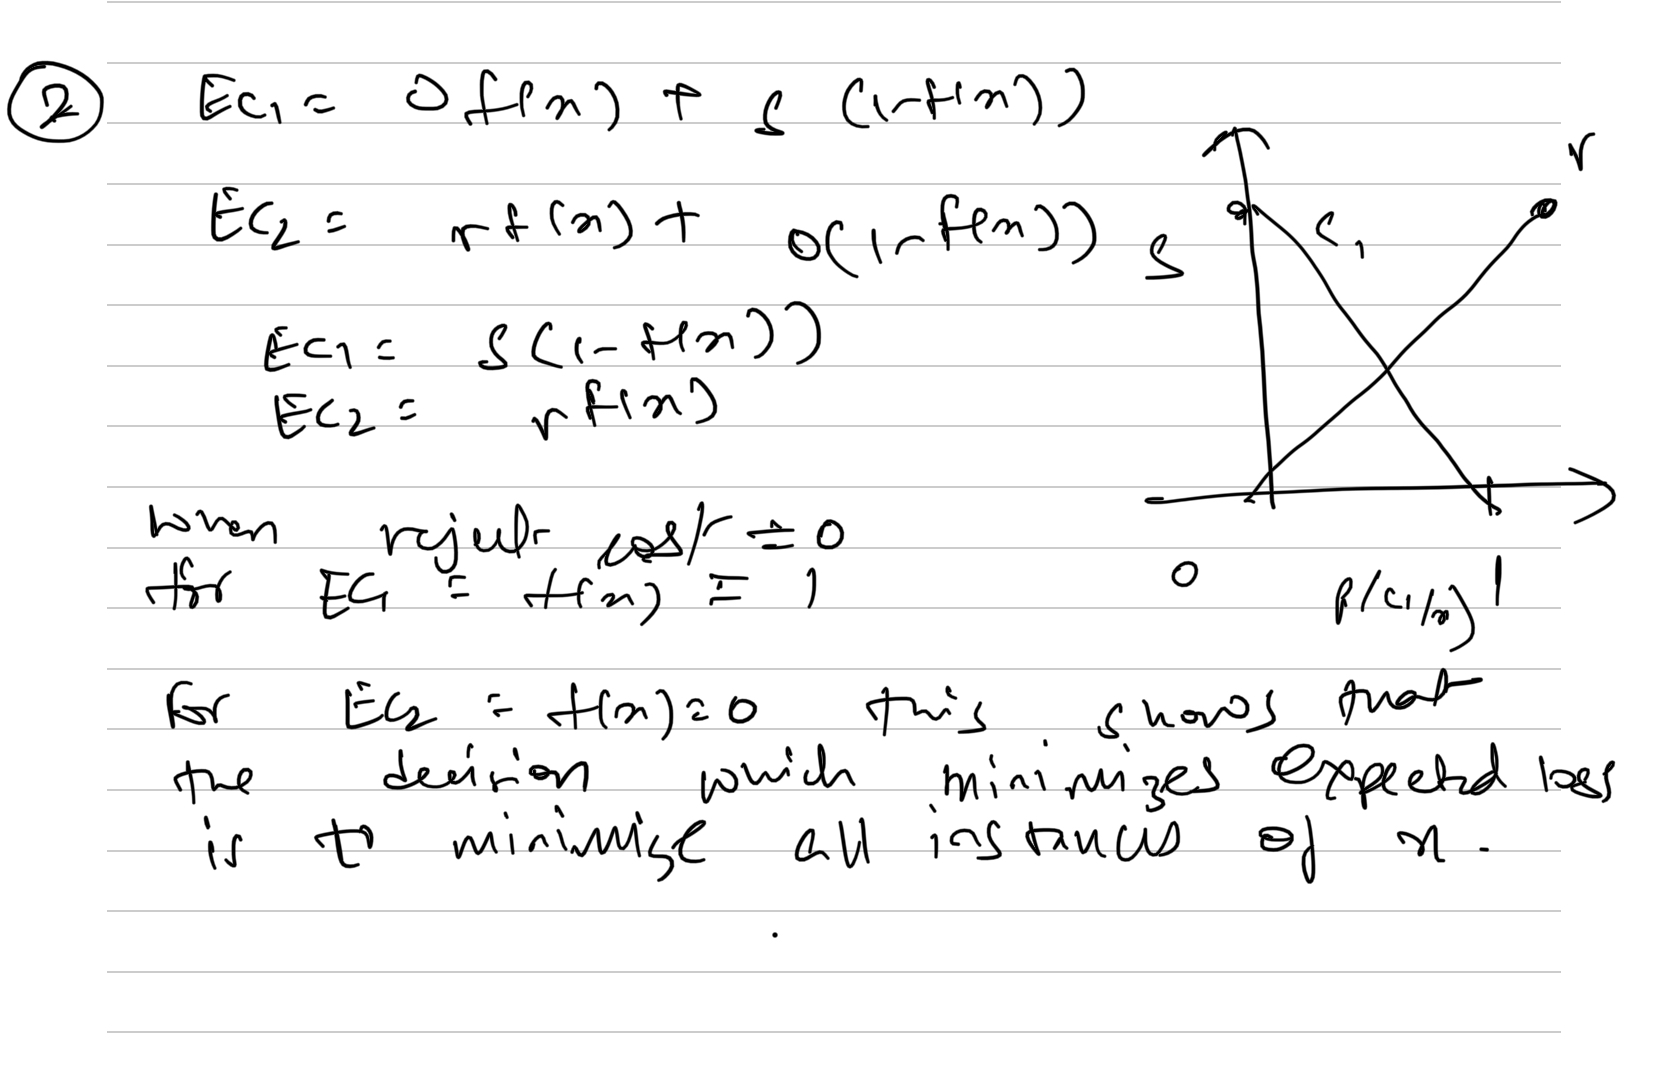

In [324]:
Image("/Users/sreekarl/Desktop/MSBA/Fall Semester/Advanced Machine Learning/Homework/HW 4/Images/Q1.2.png")

### Part C)

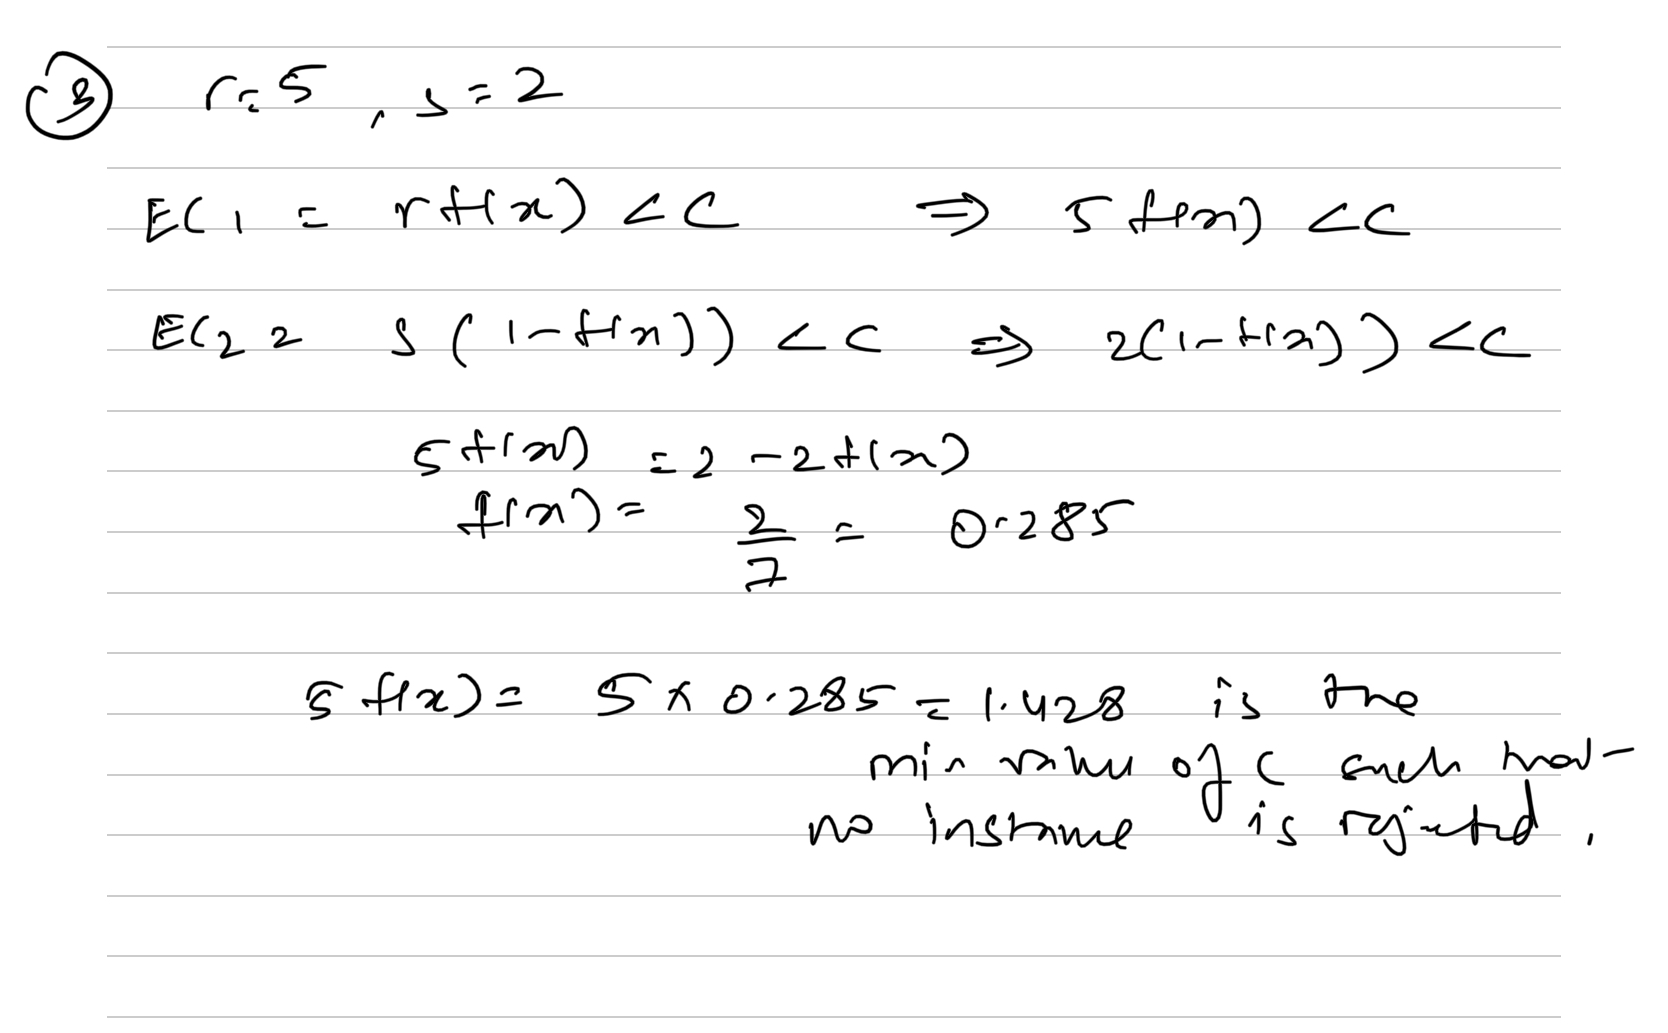

In [325]:
Image("/Users/sreekarl/Desktop/MSBA/Fall Semester/Advanced Machine Learning/Homework/HW 4/Images/Q1.3.png")

### Part D)

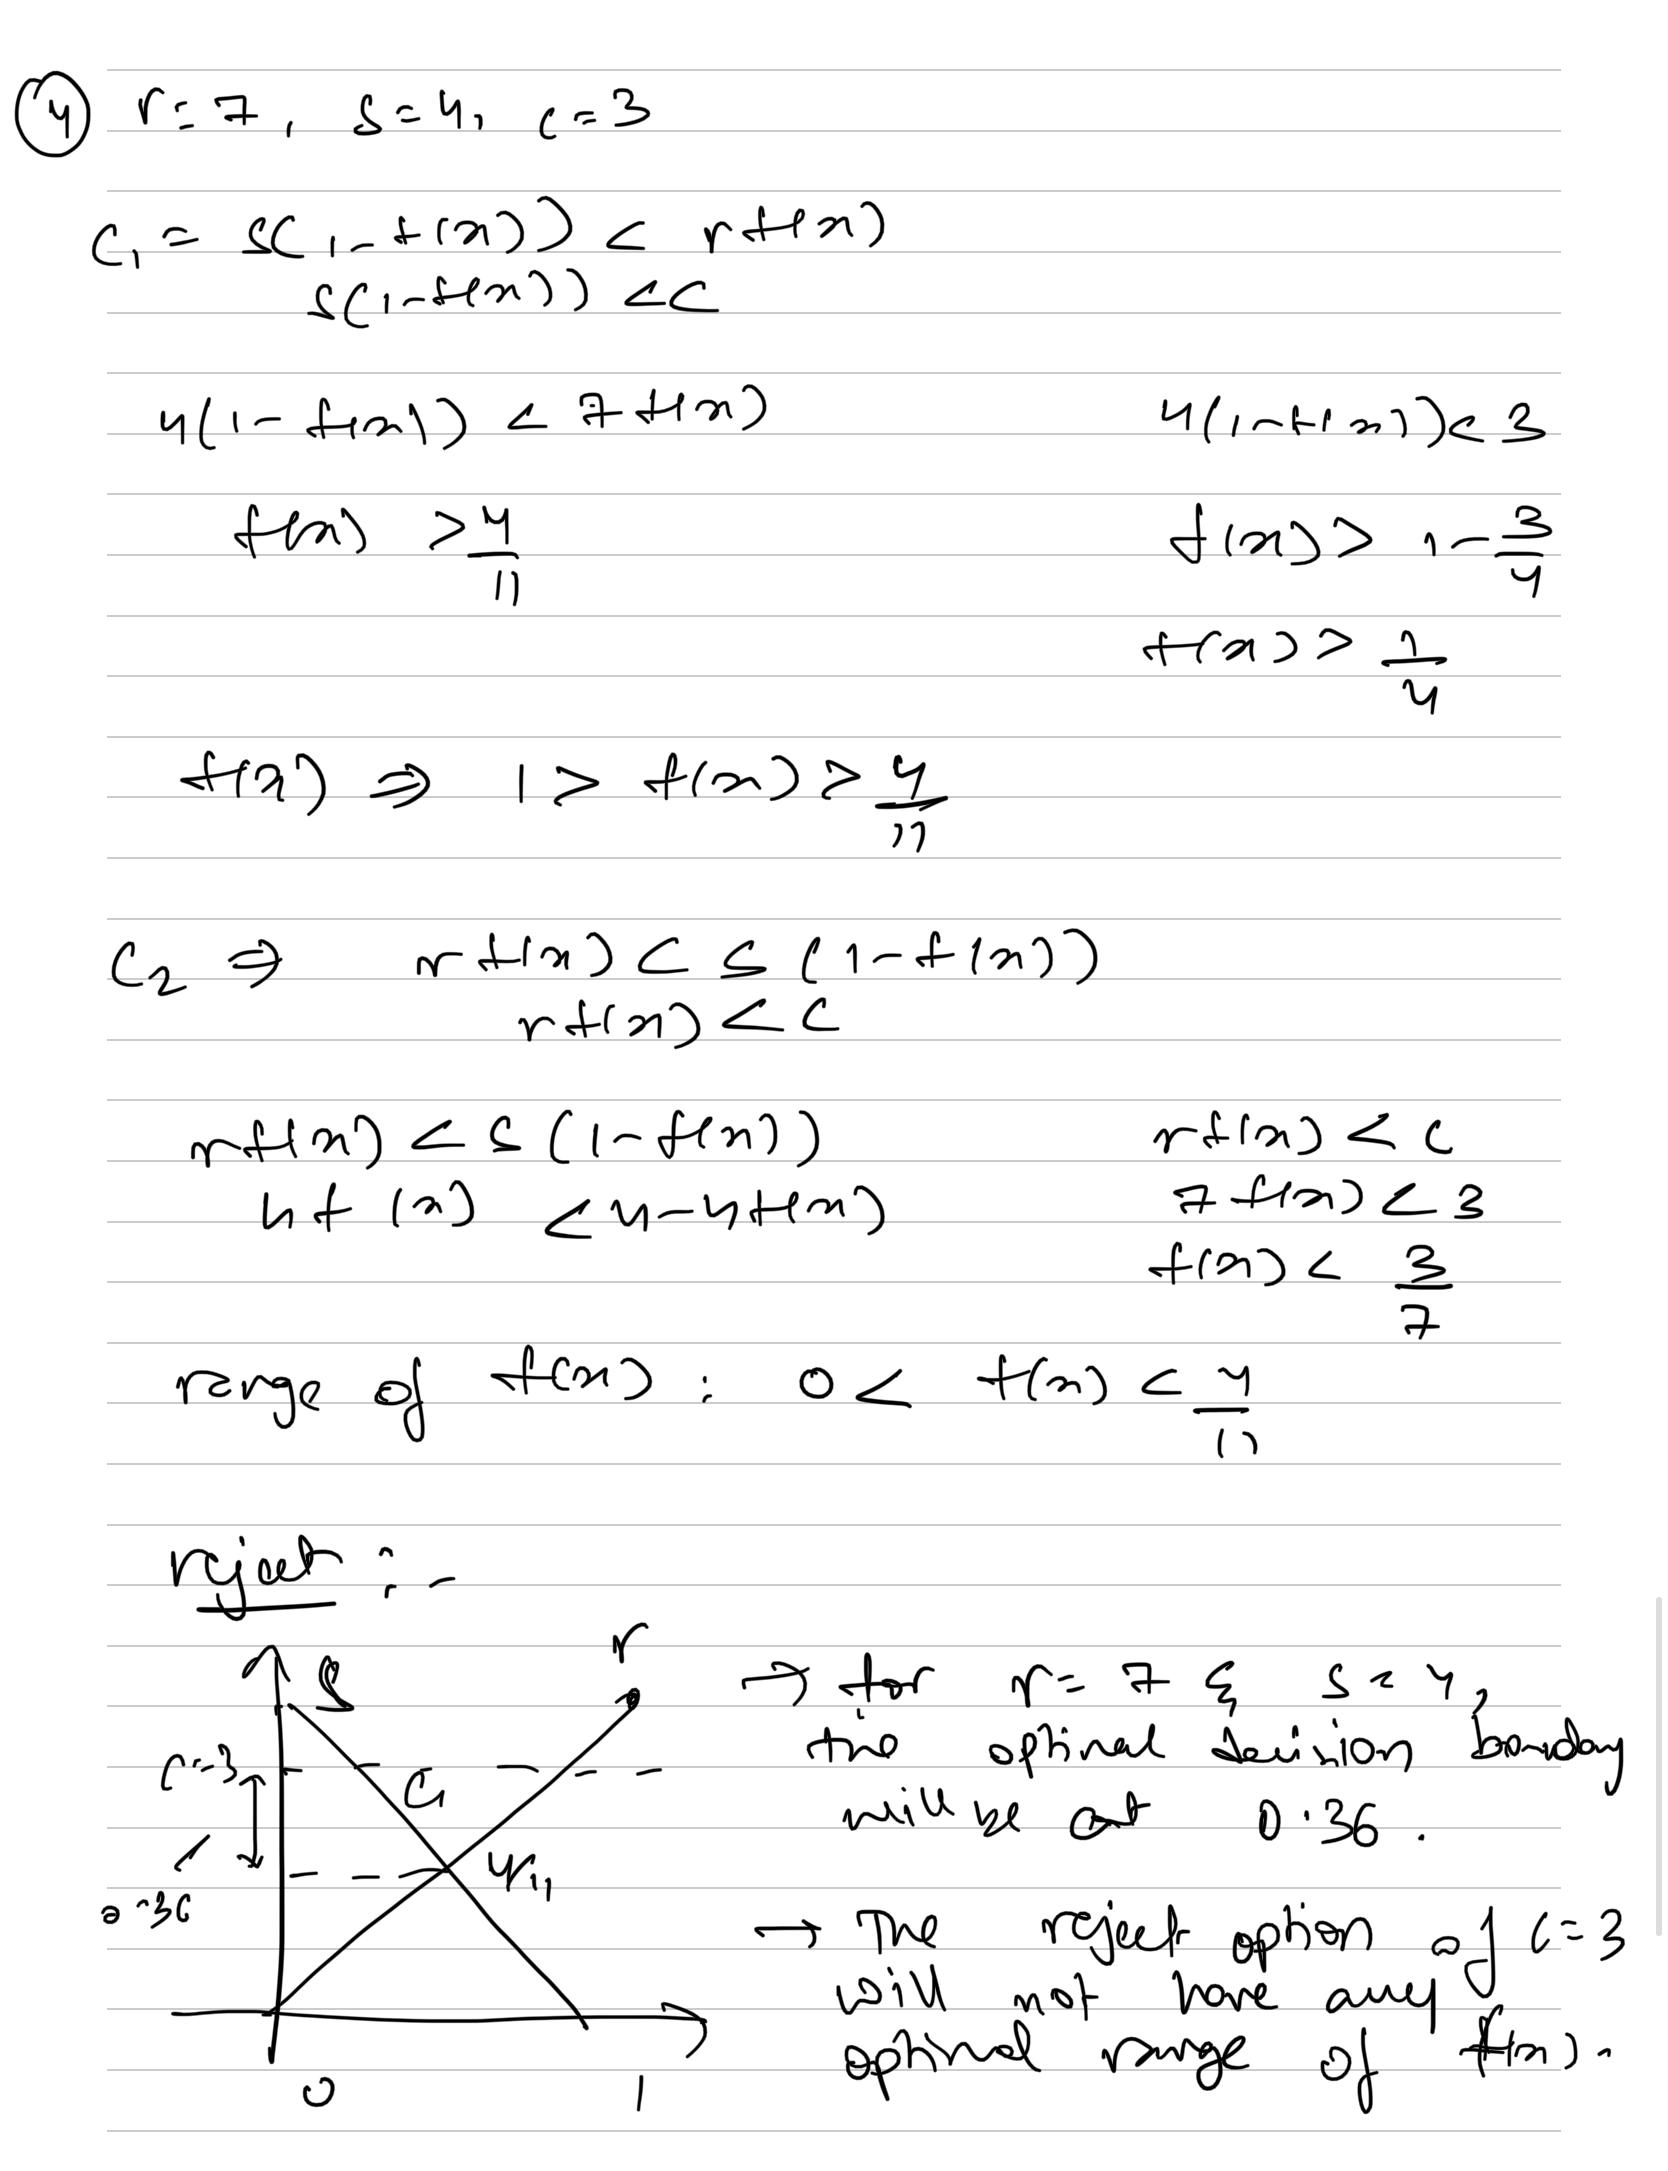

In [326]:
Image("/Users/sreekarl/Desktop/MSBA/Fall Semester/Advanced Machine Learning/Homework/HW 4/Images/Q1.4.png")

# Question 2: Logistic Regression [5 points]
Consider the problem of predicting the success of students in their undergraduate degrees given their high school GPA and SAT scores. We have the variables $X_1 =$ high school GPA, $X_2$ = SAT score and Y = completing the undergraduate degree (binary). We then fit a logistic regression which produces coefficients, $β_0 = −7$, $β_1 = 2$, $β_2 = 0.001$ Estimate the probability that George who
has a GPA of 3.4 and an SAT score of 1500 will complete his undergraduate degree successfully according to this model. By how much will the probability increase if the GPA increases to 3.7, with other factors remaining the same?

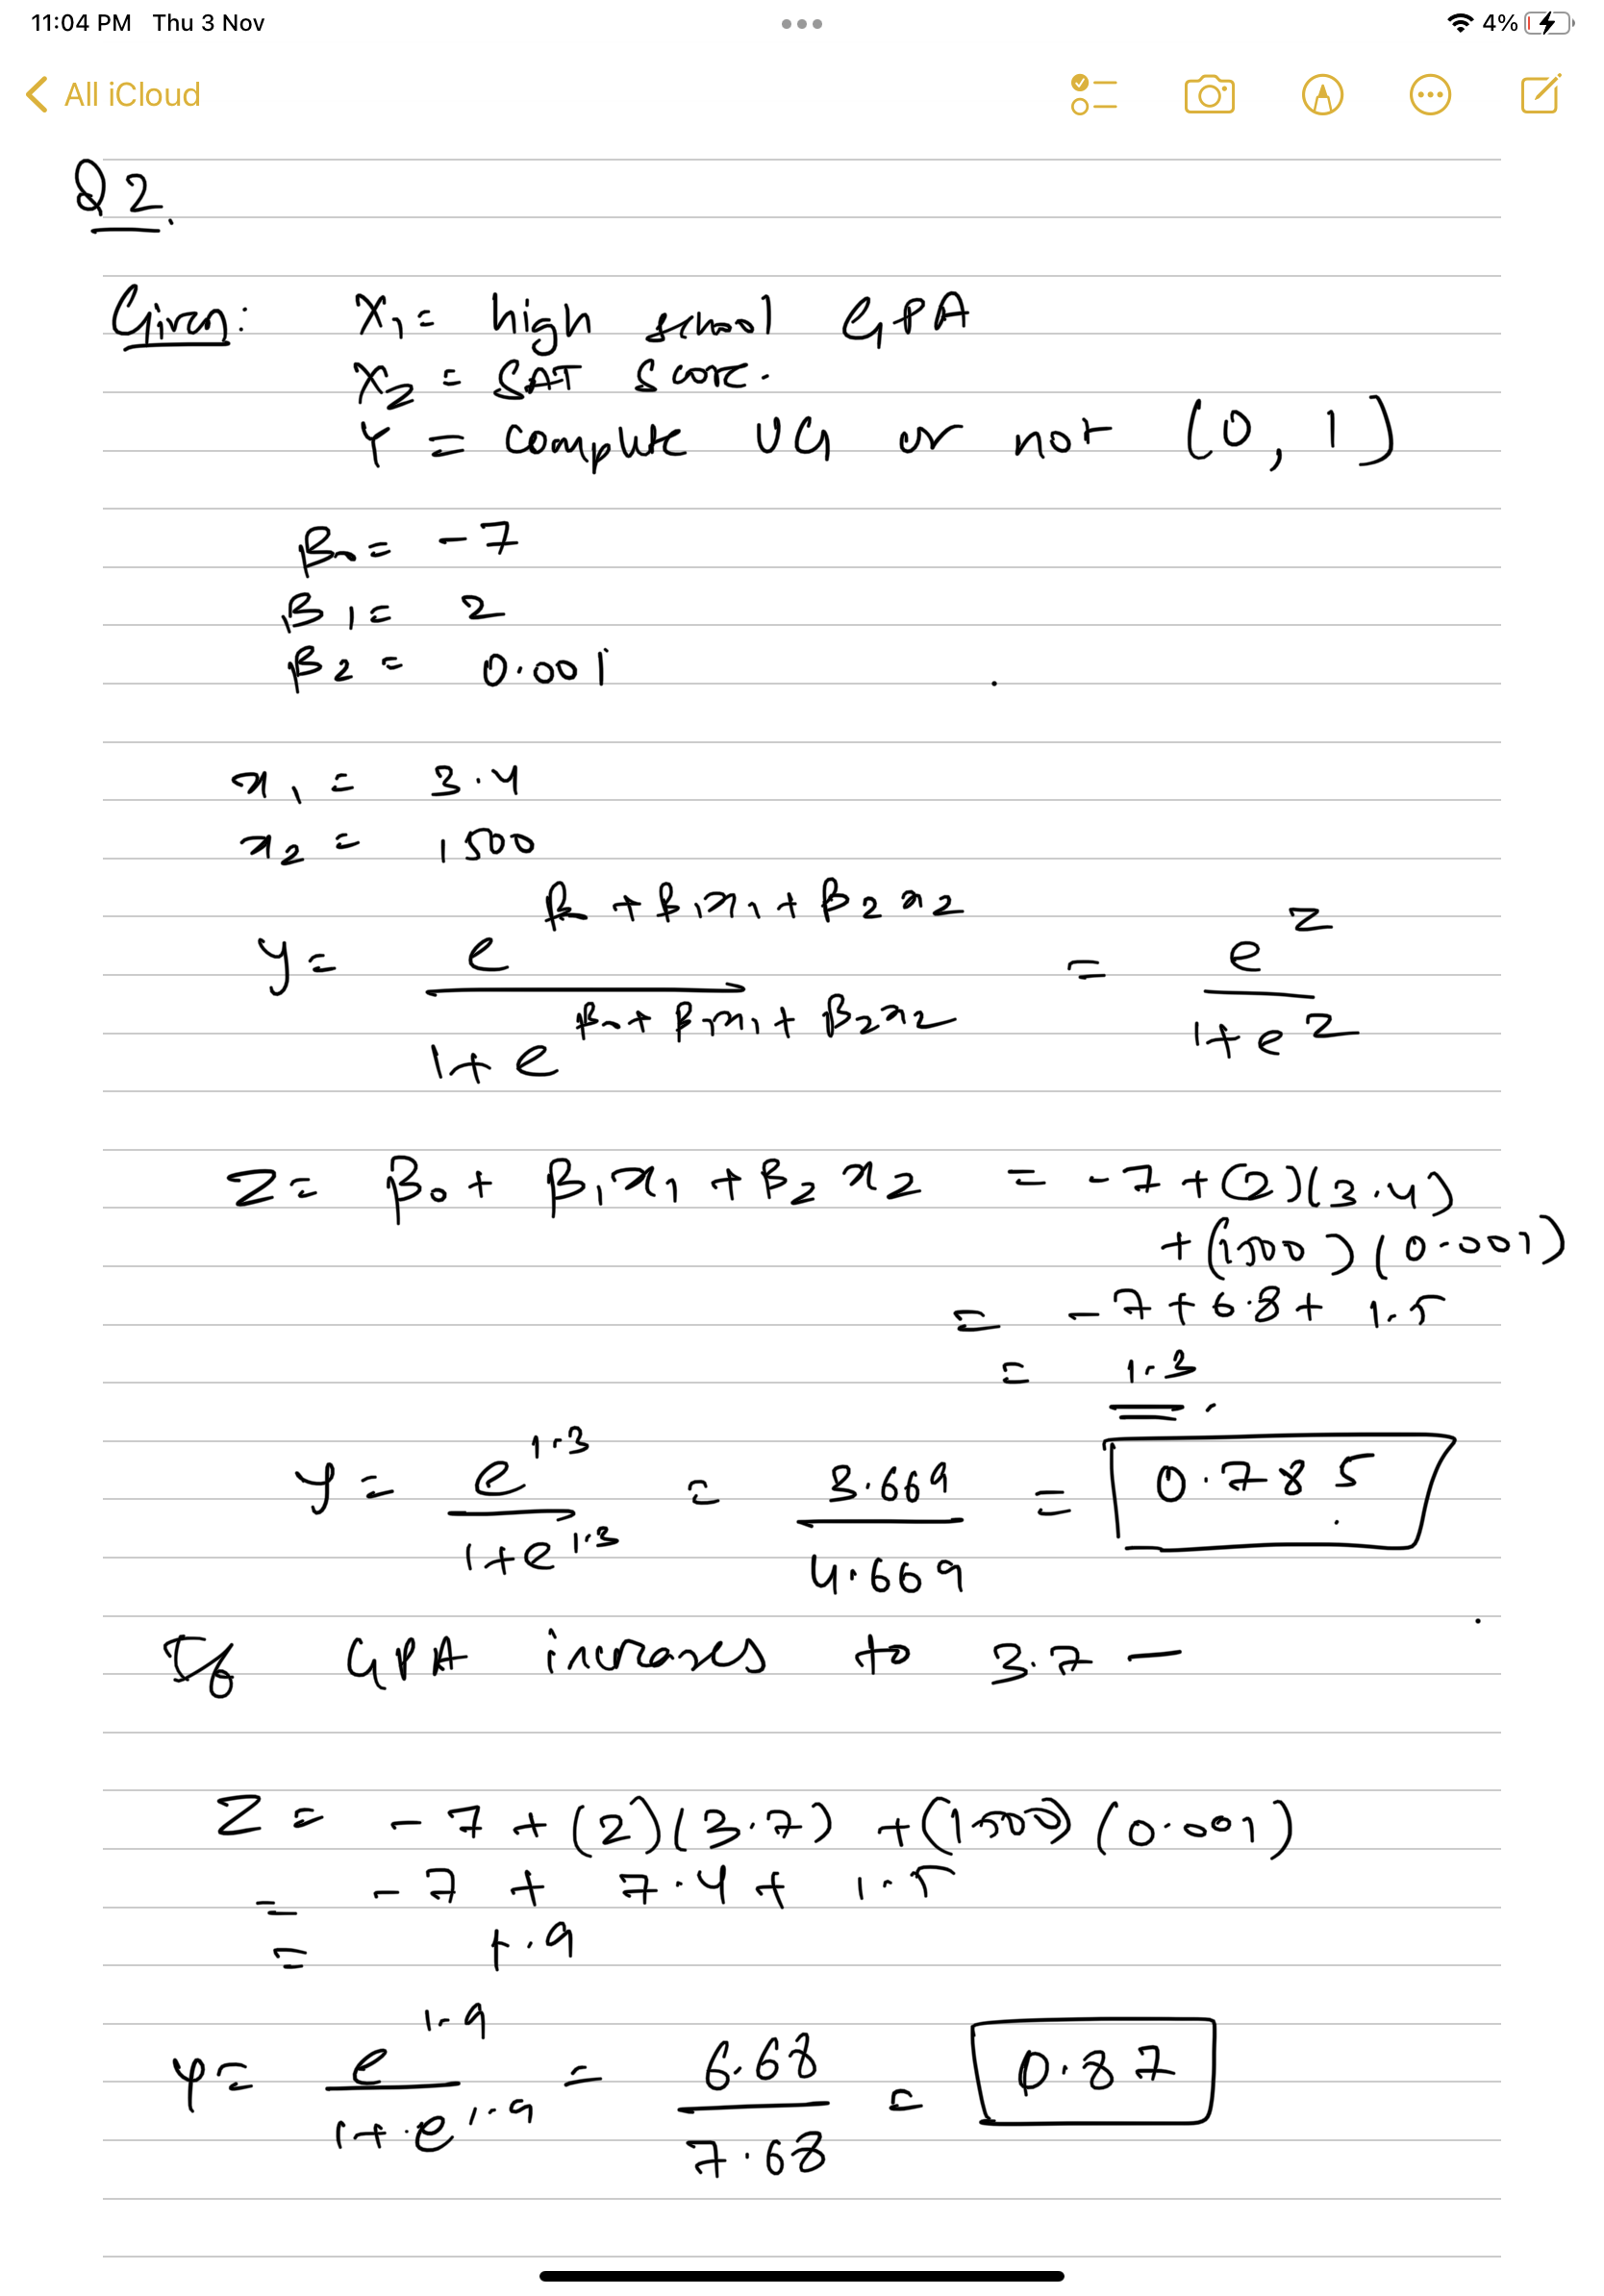

In [327]:
Image("/Users/sreekarl/Desktop/MSBA/Fall Semester/Advanced Machine Learning/Homework/HW 4/Images/Q2.png")


# Question 3: Classification and Handling Class Imbalance [35 points + 5 bonus points]

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('customer_churn_telcom.csv')

In [23]:
# Printing the first five rows
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


## [5 points] Data Preprocessing 

(a) [1 pt] Some of the columns have values like - no internet service or no phone service. Replace these two values with with a simple No

In [25]:
# Replace values with No
df.replace(['No internet service','No phone service'],'No', inplace =True)
print_unique_col_values(df) # Checking values after replacing with No

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


(b) [1 pt] Convert all 'Yes' values to 1 and 'No' values to 0 <br>
(c) [1 pt] Convert all  'Female' values to 1 and 'Male' values to 0

In [104]:
# Changing values to 0/1
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
yes_no_convert_df = df[yes_no_columns].replace(['Yes','No'],[1,0])
columns = df.columns.to_list()
non_yes_no_columns = []
for col in columns:
    if col not in yes_no_columns:
        non_yes_no_columns.append(col)
df_update = pd.merge(yes_no_convert_df, df[non_yes_no_columns],left_index = True, right_index=True).reindex(columns=columns)
df_update.replace(['Female','Male'],[1,0],inplace=True)

(d) [2 pts] Perform one-hot encoding on the folowing columns: 'InternetService', 'Contract', 'PaymentMethod'

In [105]:
# One hot encoding for categorical columns
# Name your final dataframe df 2

# Your code here

df2 = pd.get_dummies(df_update,columns = ['InternetService','Contract','PaymentMethod'])

In [284]:
df2

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0.000000,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0.464789,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,2,0,0,0,0,0.014085,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,3,0,0,0,0,0.619718,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,4,1,0,0,0,0.014085,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,0,0,1,1,0.323944,1,1,1,0,...,1,0,0,0,1,0,0,0,0,1
7028,7039,1,0,1,1,1.000000,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0
7029,7040,1,0,1,1,0.140845,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
7030,7041,0,1,1,0,0.042254,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1


In [282]:
# Scaling
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

e) [1 pt] Split the dataset into training and test using a 80-20 split with a random state of 15. Perform stratified sampling on the target variable while doing so. Split the training data further into training (80%) and validation sets (20%) with a random state of 15. Perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function. 

In [107]:
# Train test split
from sklearn.model_selection import train_test_split
df2_X_cols = []
df2_Y_cols = ['Churn']
for col in df2.columns.to_list():
    if col not in df2_Y_cols:
        df2_X_cols.append(col)
df2_X = df2[df2_X_cols] 
df2_Y = df2[df2_Y_cols]

#Splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(df2_X, df2_Y, test_size=0.2, random_state=15, stratify=df2_Y)

#Splitting train further into validation and training
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 15)

In [108]:
# With samples corresponding to the positive class being very low, we can clearly see the imbalance in our data 
print('Churn occurences in the training set \n', y_train.value_counts())
print('\n')
print('Churn occurences throughout the data \n', df2_Y.value_counts())

Churn occurences in the training set 
 Churn
0        4130
1        1495
dtype: int64


Churn occurences throughout the data 
 Churn
0        5163
1        1869
dtype: int64


## [15 points] Decision Trees, Logistic Regression, and MLP

Use the example provided [here](https://scikit-learn.org/stable/modules/tree.html) to get an idea of how to use sklearn's decision tree classifier.

Go through the documentation [here](https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html) to understand how to use sklearn's logistic regression model.

Go through the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to understand how to use sklearn's MLP Model.

(a) [5 pts (+5 bonus points)] Train the three classifiers on the dataset and print confusion matrix on both - the validation data as well as the test data for all the three models (you can either use default parameters for MLP classifier or change them to obtain higher performance for additional bonus of 5 points). <br>
(b) [5 pts] Plot the ROC Curves for all the three classifiers in a single graph and display the AUC-ROC scores for all the classifiers in this plot as well. Use both the validation and the test data to plot these curves as well as to calculate the AUC-ROC scores. Use one graph for validation data and one graph for test data (all models for validation data in one graph and all models for test data in one graph - and use this scheme for plotting in all subsequent plotting questions). <br>
(c) [5 pts] Plot the Precision-Recall curves for all the three classifiers in a single graph. Use both the validation and the test data to plot these curves. Use one graph for validation data and one graph for test data.

Helpful resources can be found here - 
1. [sklearn.tree.DecisionTreeClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
2.  [sklearn.linear_model.LogisticRegression.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
3. [sklearn.neutral_network.MLPClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/36958fb24/sklearn/base.py#L640)
4. [sklearn.metrics.plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)
5. [sklearn.metrics_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

Note: In this question, we are using the default parameters for MLP classifier, but you can change these parameters to obtain higher accuracies. **For a bonus of 5 points, experiment with these parameters to obtain a higher performance (in terms of accuracy and AUC-ROC scores).**

In [109]:
X_train1

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3526,3532,1,0,0,0,0.197183,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3550,3556,0,0,1,1,0.070423,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
6651,6660,0,0,1,0,0.000000,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2027,2032,1,0,1,0,0.197183,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
850,852,0,0,0,0,0.014085,1,1,0,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5501,0,0,0,0,0.225352,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4203,4210,1,1,1,1,0.845070,1,1,0,0,...,1,0,0,0,1,0,0,0,1,0
6351,6360,1,0,0,0,0.000000,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3430,3436,0,0,0,0,0.338028,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0


---------Decision Tree Classifier--------- 


Text(452.23636363636354, 0.5, 'Actual Values ')

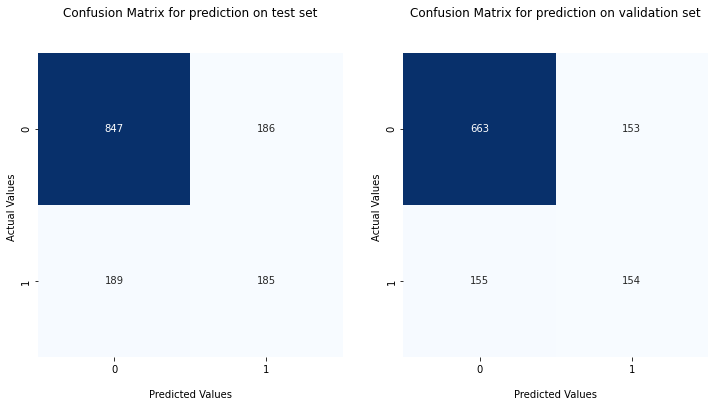

In [212]:
# Decision Tree Classifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

DT_clf = tree.DecisionTreeClassifier()
DT_clf.fit(X_train1, y_train1)
DT_y_test_pred = DT_clf.predict(X_test) #predicting on testing data
DT_y_val_pred = DT_clf.predict(X_val) #predicting on validation data

print('---------Decision Tree Classifier--------- ')

fig,axis =plt.subplots(1,2, figsize=(12, 12))
cf1 = sns.heatmap(confusion_matrix(y_test,DT_y_test_pred),annot=True,fmt=".0f", cmap='Blues',ax=axis[0],square = True,cbar = False)
cf1.set_title('Confusion Matrix for prediction on test set\n\n')
cf1.set_xlabel('\nPredicted Values')
cf1.set_ylabel('Actual Values ')

cf2 = sns.heatmap(confusion_matrix(y_val,DT_y_val_pred),annot=True,fmt=".0f", cmap='Blues',ax=axis[1], square = True,cbar = False)
cf2.set_title('Confusion Matrix for prediction on validation set\n\n')
cf2.set_xlabel('\nPredicted Values')
cf2.set_ylabel('Actual Values ')

---------Logistic Regression Classifier--------- 


/Users/sreekarl/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(452.23636363636354, 0.5, 'Actual Values ')

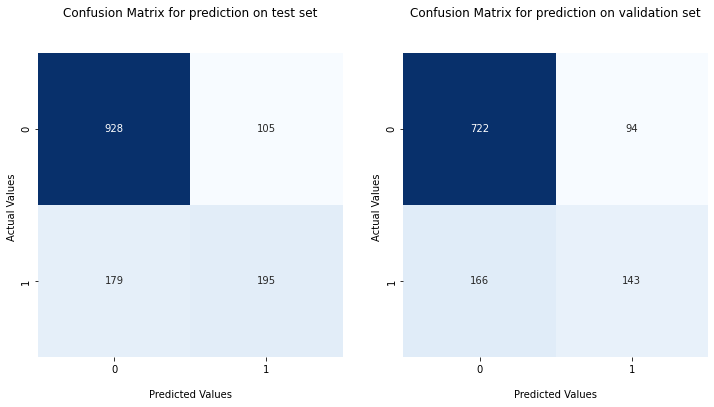

In [213]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)

logreg_y_test_pred = logreg.predict(X_test) #predicting on testing data
logreg_y_val_pred = logreg.predict(X_val) #predicting on validation data
print('---------Logistic Regression Classifier--------- ')

fig,axis =plt.subplots(1,2, figsize=(12, 12))
cf1 = sns.heatmap(confusion_matrix(y_test,logreg_y_test_pred),annot=True,fmt=".0f", cmap='Blues',ax=axis[0],square = True,cbar = False)
cf1.set_title('Confusion Matrix for prediction on test set\n\n')
cf1.set_xlabel('\nPredicted Values')
cf1.set_ylabel('Actual Values ')

cf2 = sns.heatmap(confusion_matrix(y_val,logreg_y_val_pred),annot=True,fmt=".0f", cmap='Blues',ax=axis[1], square = True,cbar = False)
cf2.set_title('Confusion Matrix for prediction on validation set\n\n')
cf2.set_xlabel('\nPredicted Values')
cf2.set_ylabel('Actual Values ')

# print('Confusion Matrix for prediction on test set:\n',confusion_matrix(y_test,logreg_y_test_pred))
# print('Confusion Matrix for prediction on validation set:\n',confusion_matrix(y_val,logreg_y_val_pred))

In [302]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier

# MLP_clf = MLPClassifier(random_state=1, max_iter=300)

MLP_clf = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
# from sklearn.model_selection import GridSearchCV
# MLP_clf = GridSearchCV(MLP_clf, parameter_space, n_jobs=-1, cv=5)

#print('Best parameters found:\n', MLP_clf.best_params_)
MLP_clf.fit(X_train1, y_train1)

MLP_y_test_pred = MLP_clf.predict(X_test)
MLP_y_val_pred = MLP_clf.predict(X_val)

---------MLP Classifier--------- 


Text(452.23636363636354, 0.5, 'Actual Values ')

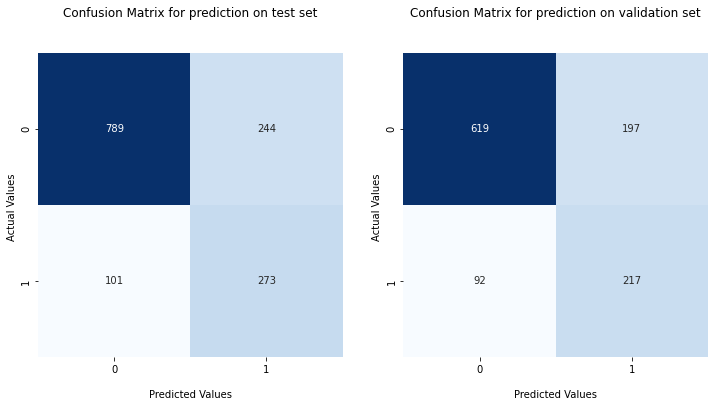

In [303]:
print('---------MLP Classifier--------- ')
fig,axis =plt.subplots(1,2, figsize=(12, 12))
cf1 = sns.heatmap(confusion_matrix(y_test,MLP_y_test_pred),annot=True,fmt=".0f", cmap='Blues',ax=axis[0],square = True,cbar = False)
cf1.set_title('Confusion Matrix for prediction on test set\n\n')
cf1.set_xlabel('\nPredicted Values')
cf1.set_ylabel('Actual Values ')

cf2 = sns.heatmap(confusion_matrix(y_val,MLP_y_val_pred),annot=True,fmt=".0f", cmap='Blues',ax=axis[1], square = True,cbar = False)
cf2.set_title('Confusion Matrix for prediction on validation set\n\n')
cf2.set_xlabel('\nPredicted Values')
cf2.set_ylabel('Actual Values ')

# print('Confusion Matrix for prediction on test set:\n',confusion_matrix(y_test,MLP_y_test_pred))
# print('Confusion Matrix for prediction on validation set:\n',confusion_matrix(y_val,MLP_y_val_pred))

#### Improving MLP model performance

In [308]:
parameter_space = {
    'hidden_layer_sizes': [(10,10,), (20,20,), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter':[1000, 2000, 3000],
    'learning_rate_init':[0.03, 0.003, 0.0003]
}

from sklearn.model_selection import GridSearchCV, PredefinedSplit

#using the validation set for gridsearch
X = np.concatenate((X_train1, X_val))
y = np.concatenate((y_train1, y_val))
ps = PredefinedSplit(np.concatenate((np.zeros(len(X_train1) - 1), np.ones(len(X_val)))))

gs = GridSearchCV(MLP_clf, param_grid=parameter_space, cv = ps,  return_train_score=True, scoring='f1')

gs.fit(X, y)



GridSearchCV(cv=PredefinedSplit(test_fold=array([0, 0, ..., 1, 1])),
             estimator=MLPClassifier(max_iter=100),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 10), (20, 20), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.03, 0.003, 0.0003],
                         'max_iter': [1000, 2000, 3000],
                         'solver': ['sgd', 'adam']},
             return_train_score=True, scoring='f1')

In [310]:
print('Best parameters found:\n', gs.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.003, 'max_iter': 3000, 'solver': 'adam'}


---------MLP Classifier with best parameters--------- 


Text(452.23636363636354, 0.5, 'Actual Values ')

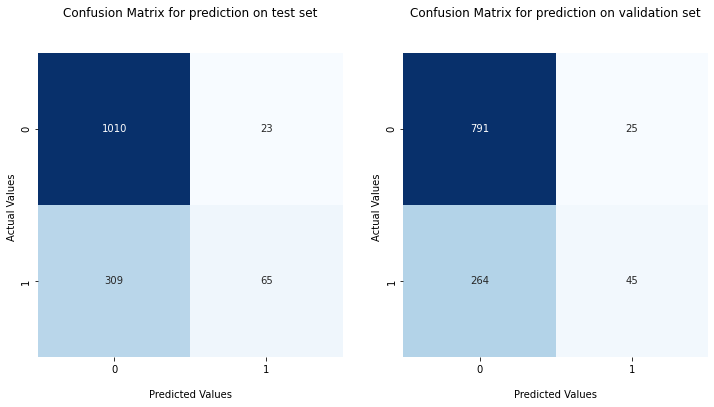

In [313]:
# using the best parameters for increasing accuracy
mlp_best_par=MLPClassifier(hidden_layer_sizes=(100,), learning_rate='constant', learning_rate_init= 0.003,
                  solver='adam',max_iter=3000, activation='relu', alpha=  0.0001)
mlp_best_par.fit(X_train1,y_train1)

MLP_best_par_y_test_pred = mlp_best_par.predict(X_test)
MLP_best_par_y_val_pred = mlp_best_par.predict(X_val)

print('---------MLP Classifier with best parameters--------- ')
fig,axis =plt.subplots(1,2, figsize=(12, 12))
cf1 = sns.heatmap(confusion_matrix(y_test,MLP_best_par_y_test_pred),annot=True,fmt=".0f", cmap='Blues',ax=axis[0],square = True,cbar = False)
cf1.set_title('Confusion Matrix for prediction on test set\n\n')
cf1.set_xlabel('\nPredicted Values')
cf1.set_ylabel('Actual Values ')

cf2 = sns.heatmap(confusion_matrix(y_val,MLP_best_par_y_val_pred),annot=True,fmt=".0f", cmap='Blues',ax=axis[1], square = True,cbar = False)
cf2.set_title('Confusion Matrix for prediction on validation set\n\n')
cf2.set_xlabel('\nPredicted Values')
cf2.set_ylabel('Actual Values ')

# print('Confusion Matrix for prediction on test set:\n',confusion_matrix(y_test,MLP_y_test_pred))
# print('Confusion Matrix for prediction on validation set:\n',confusion_matrix(y_val,MLP_y_val_pred))

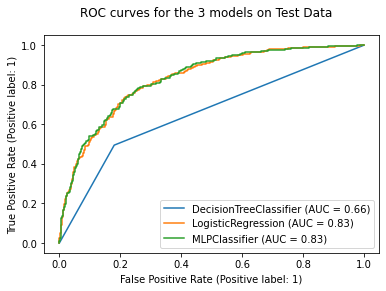

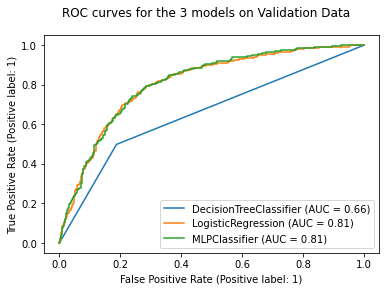

In [225]:
# Plot ROC curves (For both test and validation)

DT_ROC_test = metrics.plot_roc_curve(DT_clf, X_test, y_test)
Logreg_ROC_test = metrics.plot_roc_curve(logreg, X_test, y_test,ax = DT_ROC_test.ax_)
MLP_ROC_test = metrics.plot_roc_curve(MLP_clf, X_test, y_test,ax=Logreg_ROC_test.ax_)
MLP_ROC_test.figure_.suptitle("ROC curves for the 3 models on Test Data")
plt.show()

# Plot ROC curves (For both test and validation)
DT_ROC_val = metrics.plot_roc_curve(DT_clf, X_val, y_val)
Logreg_ROC_val = metrics.plot_roc_curve(logreg, X_val, y_val,ax = DT_ROC_val.ax_)
MLP_ROC_val = metrics.plot_roc_curve(MLP_clf, X_val, y_val,ax=Logreg_ROC_val.ax_)
MLP_ROC_val.figure_.suptitle("ROC curves for the 3 models on Validation Data")
plt.show()



Text(0.5, 0.98, 'PR curves for the 3 models on Validation Data')

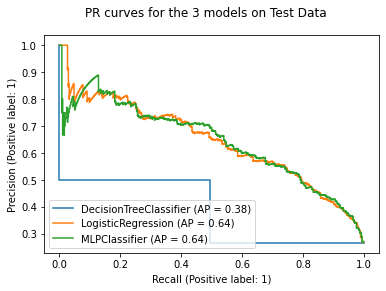

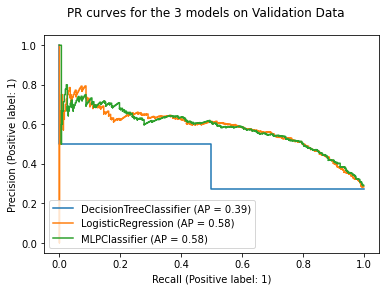

In [232]:
# Plot PR curves
from sklearn.metrics import PrecisionRecallDisplay

DT_PR_test= PrecisionRecallDisplay.from_estimator(DT_clf, X_test, y_test)
LogReg_PR_test = PrecisionRecallDisplay.from_estimator(logreg, X_test, y_test,ax=DT_PR_test.ax_)
MLP_PR_test = PrecisionRecallDisplay.from_estimator(MLP_clf, X_test, y_test,ax=LogReg_PR_test.ax_)
MLP_PR_test.figure_.suptitle("PR curves for the 3 models on Test Data")

DT_PR_val= PrecisionRecallDisplay.from_estimator(DT_clf, X_val, y_val)
LogReg_PR_val = PrecisionRecallDisplay.from_estimator(logreg, X_val, y_val,ax=DT_PR_val.ax_)
MLP_PR_test = PrecisionRecallDisplay.from_estimator(MLP_clf, X_val, y_val,ax=LogReg_PR_val.ax_)
MLP_PR_test.figure_.suptitle("PR curves for the 3 models on Validation Data")

## [4 points] Handling Class Imbalance with SMOTE

Go through the documentation [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) to understand how to use imbalanced-learn's SMOTE to counter class imbalance in the data.

(a) [1 pt] Split the data into training (80%) and test sets (20%) with a random state of 15. Perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function. 

In [260]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

(b) [2 pts] Perform SMOTE on the training data and print the value counts of the target variable in the data.

In [261]:
# To install imbalanced-learn library use pip install imbalanced-learn command
# !pip install imbalanced-learn
# !pip install scikit-learn==1.1.3
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=15)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)

print(y_res.value_counts())

Churn
0        4130
1        4130
dtype: int64


(c) [1 pt] Split the updated training data (on which SMOTE has been run) further into training (80%) and validation sets (20%) with a random state of 15. Perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function. 

In [263]:
# Answer here
X_train_SMOTE, X_val_SMOTE, y_train_SMOTE, y_val_SMOTE = train_test_split(X_SMOTE, y_SMOTE, test_size=0.2, random_state=15, stratify=y_SMOTE)

In [265]:
# Number of classes in training Data
y_train_SMOTE.value_counts()

1    3304
0    3304
Name: Churn, dtype: int64

In [266]:
# Number of classes in validation Data
y_val_SMOTE.value_counts()

1    826
0    826
Name: Churn, dtype: int64

## [2 points] Retraining the Classifiers

Now that we have created synthetic samples of the minority class, let's proceed further to see if we see any improvements in our results. For the two models - Logistic regressor and MLP, do the folowing:

(a) [1 pt] Train a model on the training dataset. <br>
(b) [1 pt] Make predictions on the test data using the trained model and print confusion matrix for both - the validation and the test data.

---------Logistic Regression Classifier--------- 


Text(452.23636363636354, 0.5, 'Actual Values ')

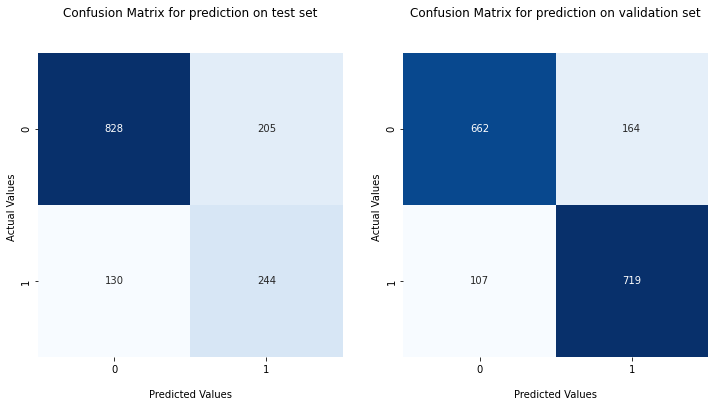

In [328]:
# Logistic Regression

logreg_SMOTE = LogisticRegression()
logreg_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
logreg_y_test_SMOTE_pred = logreg_SMOTE.predict(X_test) #predicting on testing data
logreg_y_val_SMOTE_pred = logreg_SMOTE.predict(X_val_SMOTE) #predicting on validation data
print('---------Logistic Regression Classifier--------- ')

fig,axis =plt.subplots(1,2, figsize=(12, 12))
cf1 = sns.heatmap(confusion_matrix(y_test,logreg_y_test_SMOTE_pred),annot=True,fmt=".0f", cmap='Blues',ax=axis[0],square = True,cbar = False)
cf1.set_title('Confusion Matrix for prediction on test set\n\n')
cf1.set_xlabel('\nPredicted Values')
cf1.set_ylabel('Actual Values ')

cf2 = sns.heatmap(confusion_matrix(y_val_SMOTE,logreg_y_val_SMOTE_pred),annot=True,fmt=".0f", cmap='Blues',ax=axis[1], square = True,cbar = False)
cf2.set_title('Confusion Matrix for prediction on validation set\n\n')
cf2.set_xlabel('\nPredicted Values')
cf2.set_ylabel('Actual Values ')

---------MLP Classifier--------- 


Text(452.23636363636354, 0.5, 'Actual Values ')

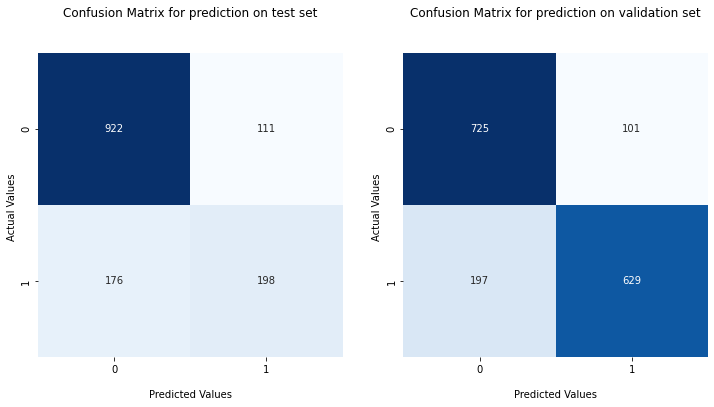

In [274]:
# MLP
MLP_clf_SMOTE = MLPClassifier(random_state=1, max_iter=300)
MLP_clf_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
MLP_y_test_SMOTE_pred = MLP_clf_SMOTE.predict(X_test)
MLP_y_val_SMOTE_pred = MLP_clf_SMOTE.predict(X_val_SMOTE)

print('---------MLP Classifier--------- ')
fig,axis =plt.subplots(1,2, figsize=(12, 12))
cf1 = sns.heatmap(confusion_matrix(y_test,MLP_y_test_SMOTE_pred),annot=True,fmt=".0f", cmap='Blues',ax=axis[0],square = True,cbar = False)
cf1.set_title('Confusion Matrix for prediction on test set\n\n')
cf1.set_xlabel('\nPredicted Values')
cf1.set_ylabel('Actual Values ')

cf2 = sns.heatmap(confusion_matrix(y_val_SMOTE,MLP_y_val_SMOTE_pred),annot=True,fmt=".0f", cmap='Blues',ax=axis[1], square = True,cbar = False)
cf2.set_title('Confusion Matrix for prediction on validation set\n\n')
cf2.set_xlabel('\nPredicted Values')
cf2.set_ylabel('Actual Values ')

## [9 points] Plotting and Comparison
a) [1 pt] For the two classifiers (Logistic regression and MLP) - plot the ROC Curves in a single graph, display the AUC-ROC scores in this plot as well on both the validation and the test data. Use one graph for validation data and one graph for test data. <br>
b) [1 pt] Plot the Precision-Recall curves for the two classifiers in a single graph on both the validation and the test data. Use one graph for validation data and one graph for test data. <br>
c) [7 pts] Compare and contrast the performance of the classifiers with reference to these two plots and with reference to the plots that were computed before using SMOTE. Specifically comment on what you observed regarding the difference in performance on the validation vs. the test dataset, which is a better representative of the actual/original problem.

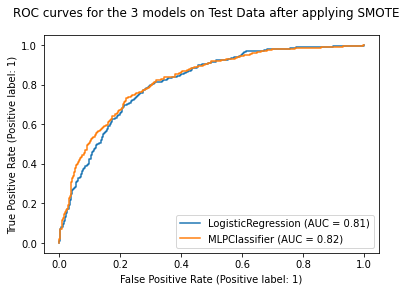

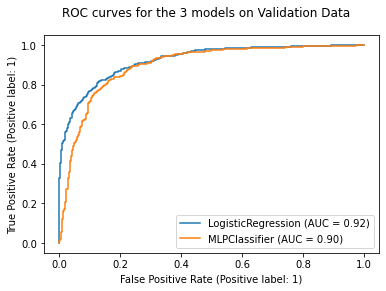

In [285]:
# Plot ROC curves
Logreg_ROC_test_SMOTE = metrics.plot_roc_curve(logreg_SMOTE, X_test, y_test)
MLP_ROC_test_SMOTE = metrics.plot_roc_curve(MLP_clf_SMOTE, X_test, y_test,ax=Logreg_ROC_test_SMOTE.ax_)
MLP_ROC_test_SMOTE.figure_.suptitle("ROC curves for the 3 models on Test Data after applying SMOTE")
plt.show()

# Plot ROC curves (For both test and validation)
Logreg_ROC_val_SMOTE = metrics.plot_roc_curve(logreg_SMOTE, X_val_SMOTE, y_val_SMOTE)
MLP_ROC_val_SMOTE = metrics.plot_roc_curve(MLP_clf_SMOTE, X_val_SMOTE, y_val_SMOTE,ax=Logreg_ROC_val_SMOTE.ax_)
MLP_ROC_val_SMOTE.figure_.suptitle("ROC curves for the 3 models on Validation Data")
plt.show()

Text(0.5, 0.98, 'PR curves for the 3 models on Validation Data')

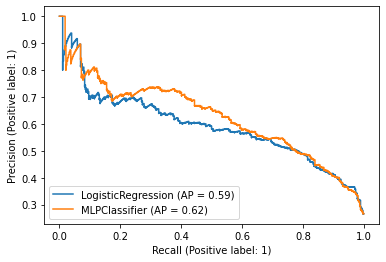

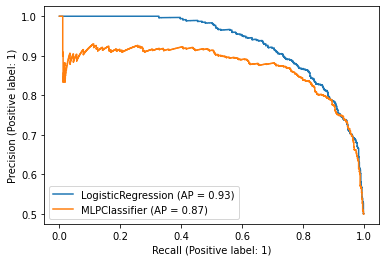

In [279]:
# Plot PR curves
LogReg_PR_test_SMOTE = PrecisionRecallDisplay.from_estimator(logreg_SMOTE, X_test, y_test)
MLP_PR_test_SMOTE = PrecisionRecallDisplay.from_estimator(MLP_clf_SMOTE, X_test, y_test,ax=LogReg_PR_test_SMOTE.ax_)
MLP_PR_test.figure_.suptitle("PR curves for the 3 models on Test Data")

LogReg_PR_val_SMOTE = PrecisionRecallDisplay.from_estimator(logreg_SMOTE, X_val_SMOTE, y_val_SMOTE)
MLP_PR_test_SMOTE = PrecisionRecallDisplay.from_estimator(MLP_clf_SMOTE, X_val_SMOTE, y_val_SMOTE,ax=LogReg_PR_val_SMOTE.ax_)
MLP_PR_test.figure_.suptitle("PR curves for the 3 models on Validation Data")

### Part c)


In [339]:
from sklearn.metrics import f1_score
#F1 scores after SMOTE

# For logistic regression f1-score TEST vs VALIDATION
f1_score(y_test,logreg_y_test_SMOTE_pred), f1_score(y_val_SMOTE,logreg_y_val_SMOTE_pred)


(0.5929526123936817, 0.8414277355178467)

In [343]:
# for mlp f1-score TEST vs VALIDATION
f1_score(y_test,MLP_y_test_SMOTE_pred), f1_score(y_val_SMOTE,MLP_y_val_SMOTE_pred)

(0.5797950219619327, 0.8084832904884318)

In [344]:
#F1 Scores before SMOTE
# For logistic regression f1-score TEST vs VALIDATION
f1_score(y_test,logreg_y_test_pred), f1_score(y_val,logreg_y_val_pred)

(0.5786350148367952, 0.5238095238095238)

In [346]:
# For MLP f1-score TEST vs VALIDATION
f1_score(y_test,MLP_y_test_pred), f1_score(y_val,MLP_y_val_pred)

(0.6127946127946128, 0.6002766251728907)

The F1-score increases marginally on the test and validation dataset for  logistic regression but mlp (untuned) it decreases after using SMOTE. For logistic regression (test data) - the f1 score increases from 57% to 59% and for mlp (test data) it decreases from 61% to 59%
On the other hand AUC score stays almost the same/increases slightly on the validation data for both lr and mlp.
This shows that oversampling technique like SMOTE slightly increases the precision and recall for the model but it does not show a drastic change
Oversampling might not always be a good idea to treat class imbalance.
There are alternative ways to handle class imbalance such as using class weighting or changing the threshold of classiying the positive and negative classes

# Question 4: Bayesian Belief Networks [15 pts]



Refer to the Bayesian Network Belief image (uploaded with the notebook on canvas) for this question. 

All nodes are binary and can take 0/1 values

The probabilities are given below:

P(Season = 1) = .001   
P(Atmospheric Pressure = 1) = .0.002


P(Rain = 1 | Season = 0, Atmospheric Pressure = 0) = .001  
P(Rain = 1 | Season = 0, Atmospheric Pressure = 1) = .29  
P(Rain = 1 | Season = 1, Atmospheric Pressure = 0) = .94  
P(Rain = 1 | Season = 1, Atmospheric Pressure = 1) = .95

P(Umbrella = 1 | Rain = 1) = .9  
P(Umbrella = 1 | Rain = 0) = .05

For the given Bayesian network, Compute the following probabilities : 


**(a) [4 pts]** Find the probability that  Umbrella = 0 

**(b) [4 pts]** Given that there is low Atmospheric Pressure (Atmospheric Pressure = 0), what is the probability that Rain = 1

**(c) [7 pts]** Given that it rains(Rain = 1), what is the probability that the it is rainy season (Season = 1)

### Part A

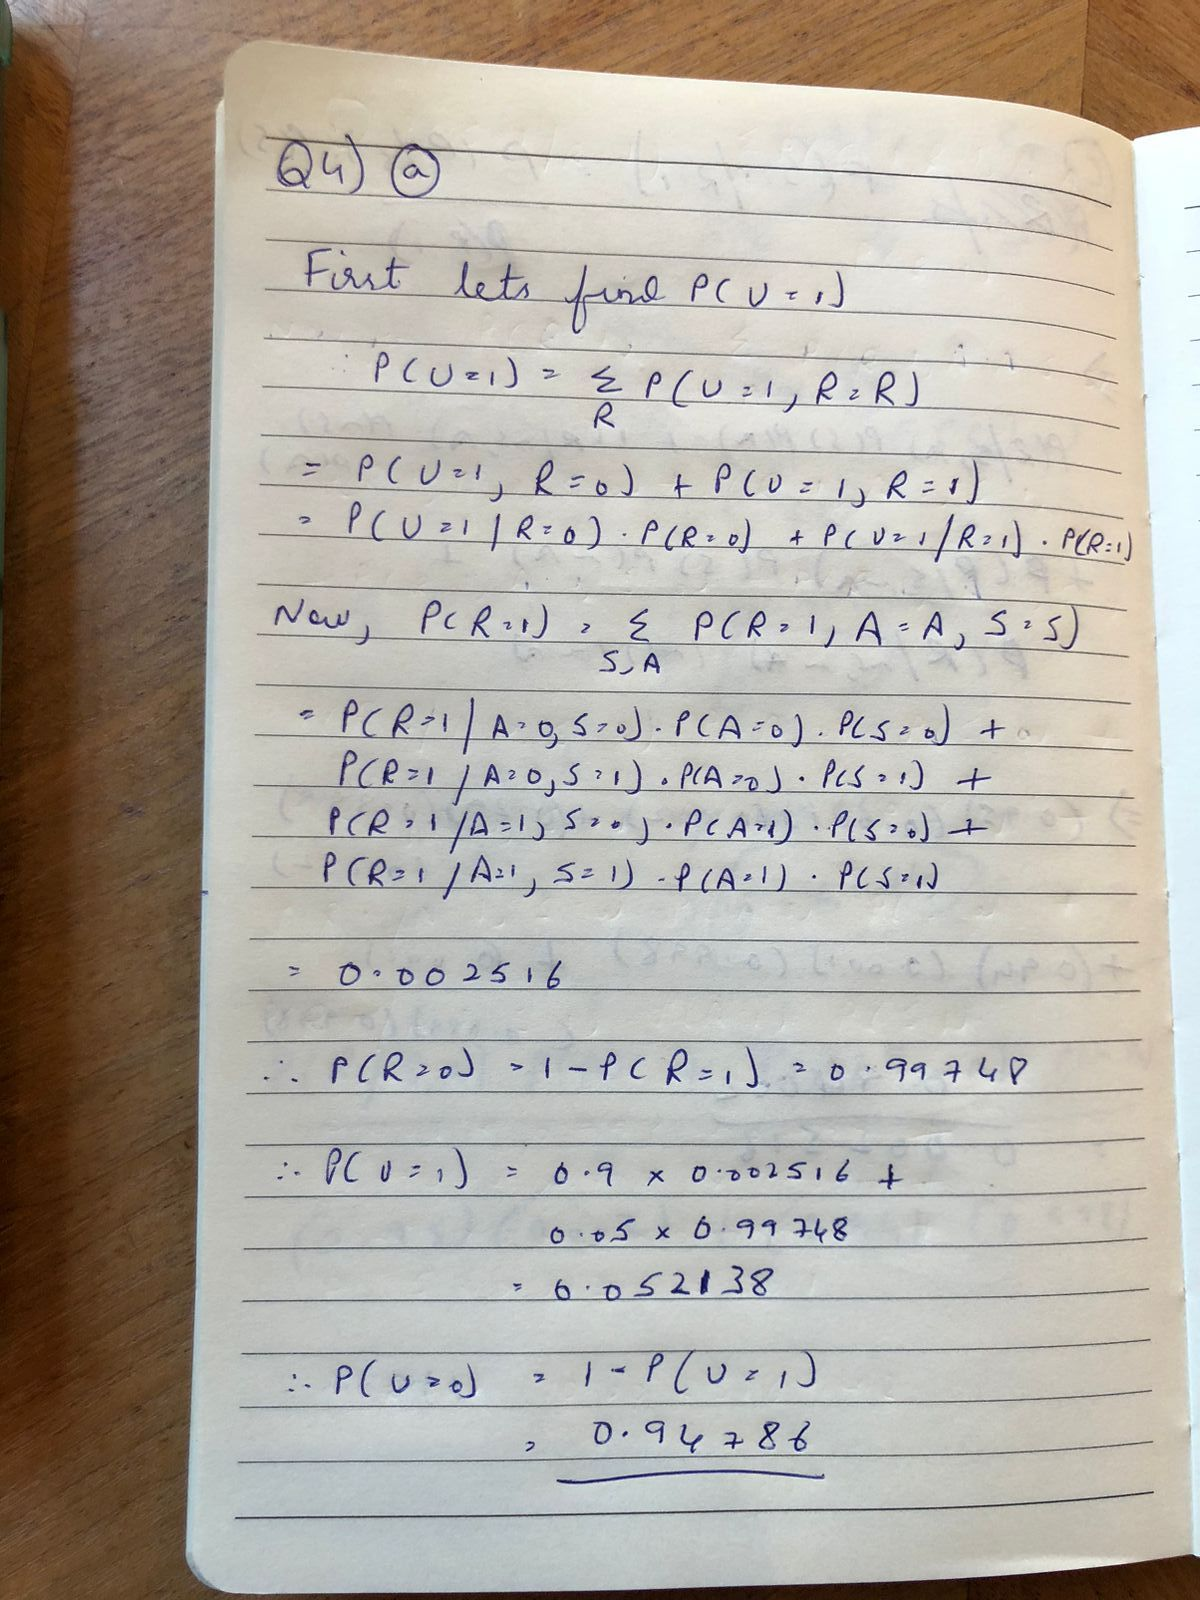

In [330]:
Image("/Users/sreekarl/Desktop/MSBA/Fall Semester/Advanced Machine Learning/Homework/HW 4/Images/Q4.A.jpeg")

### Part B)

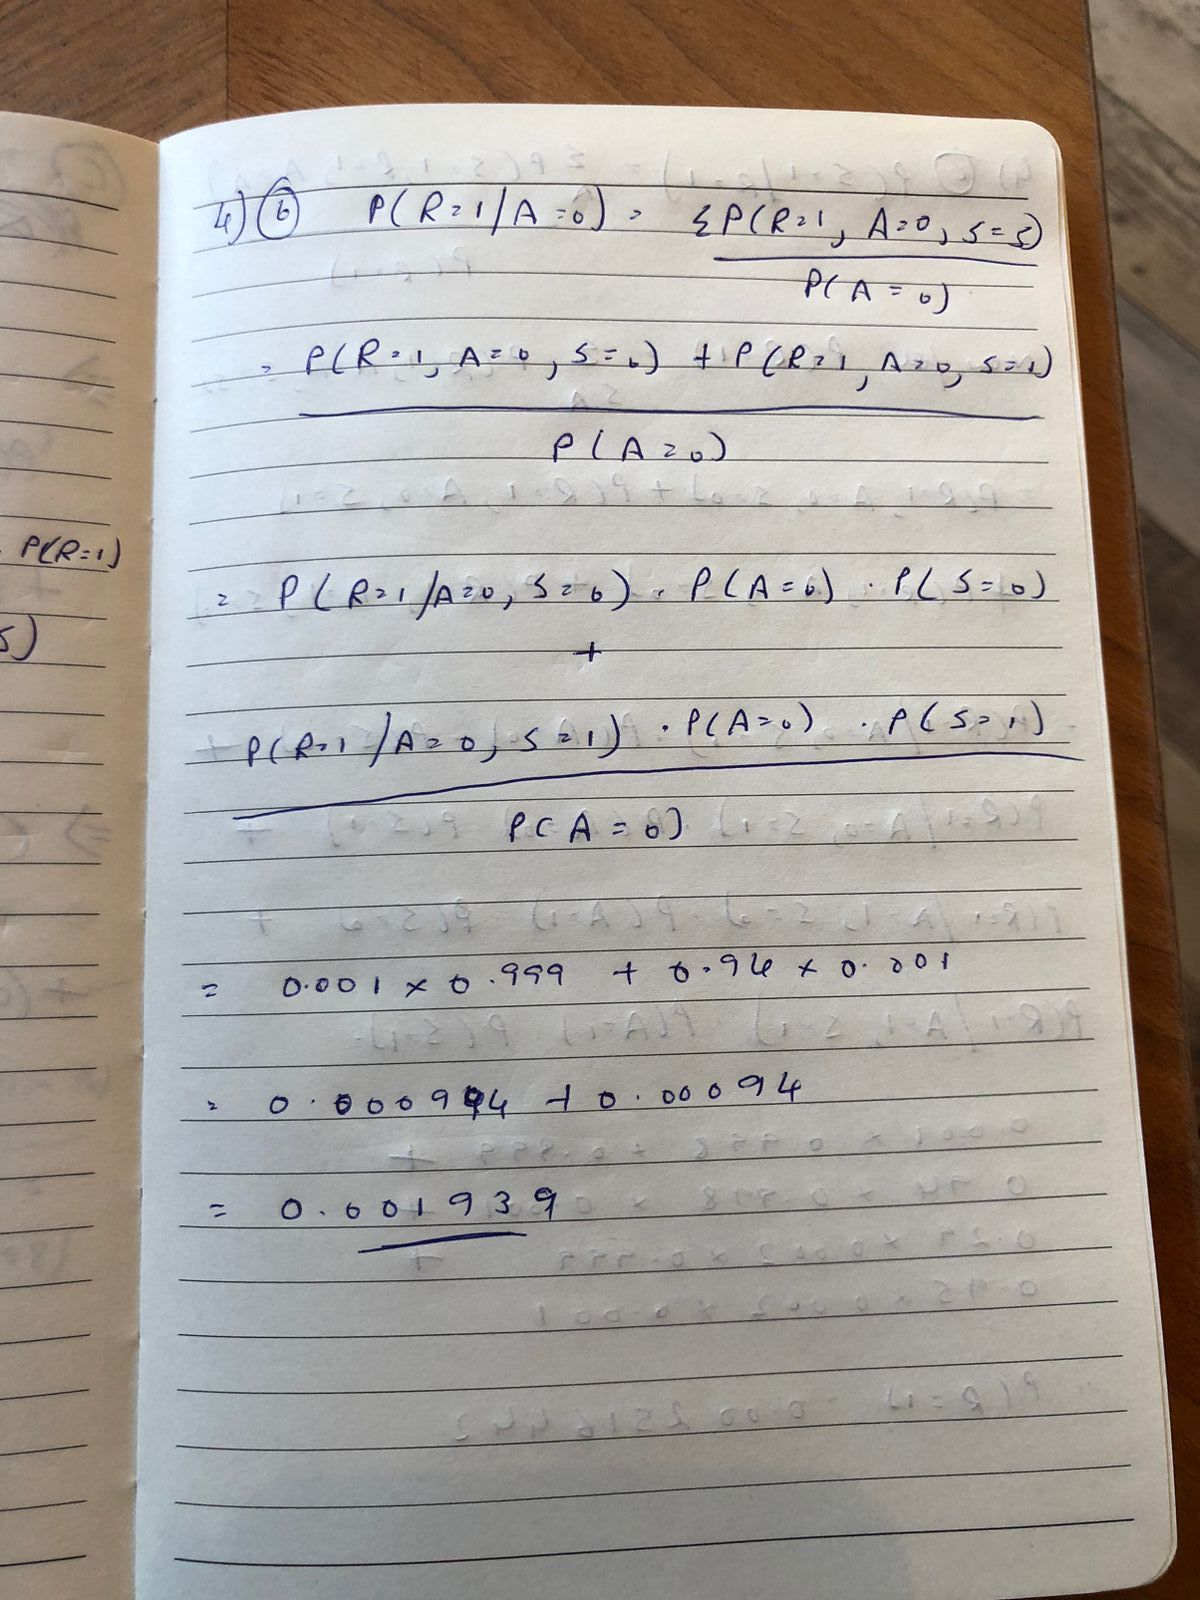

In [331]:
Image("/Users/sreekarl/Desktop/MSBA/Fall Semester/Advanced Machine Learning/Homework/HW 4/Images/Q4.B.jpeg")

### Part C)

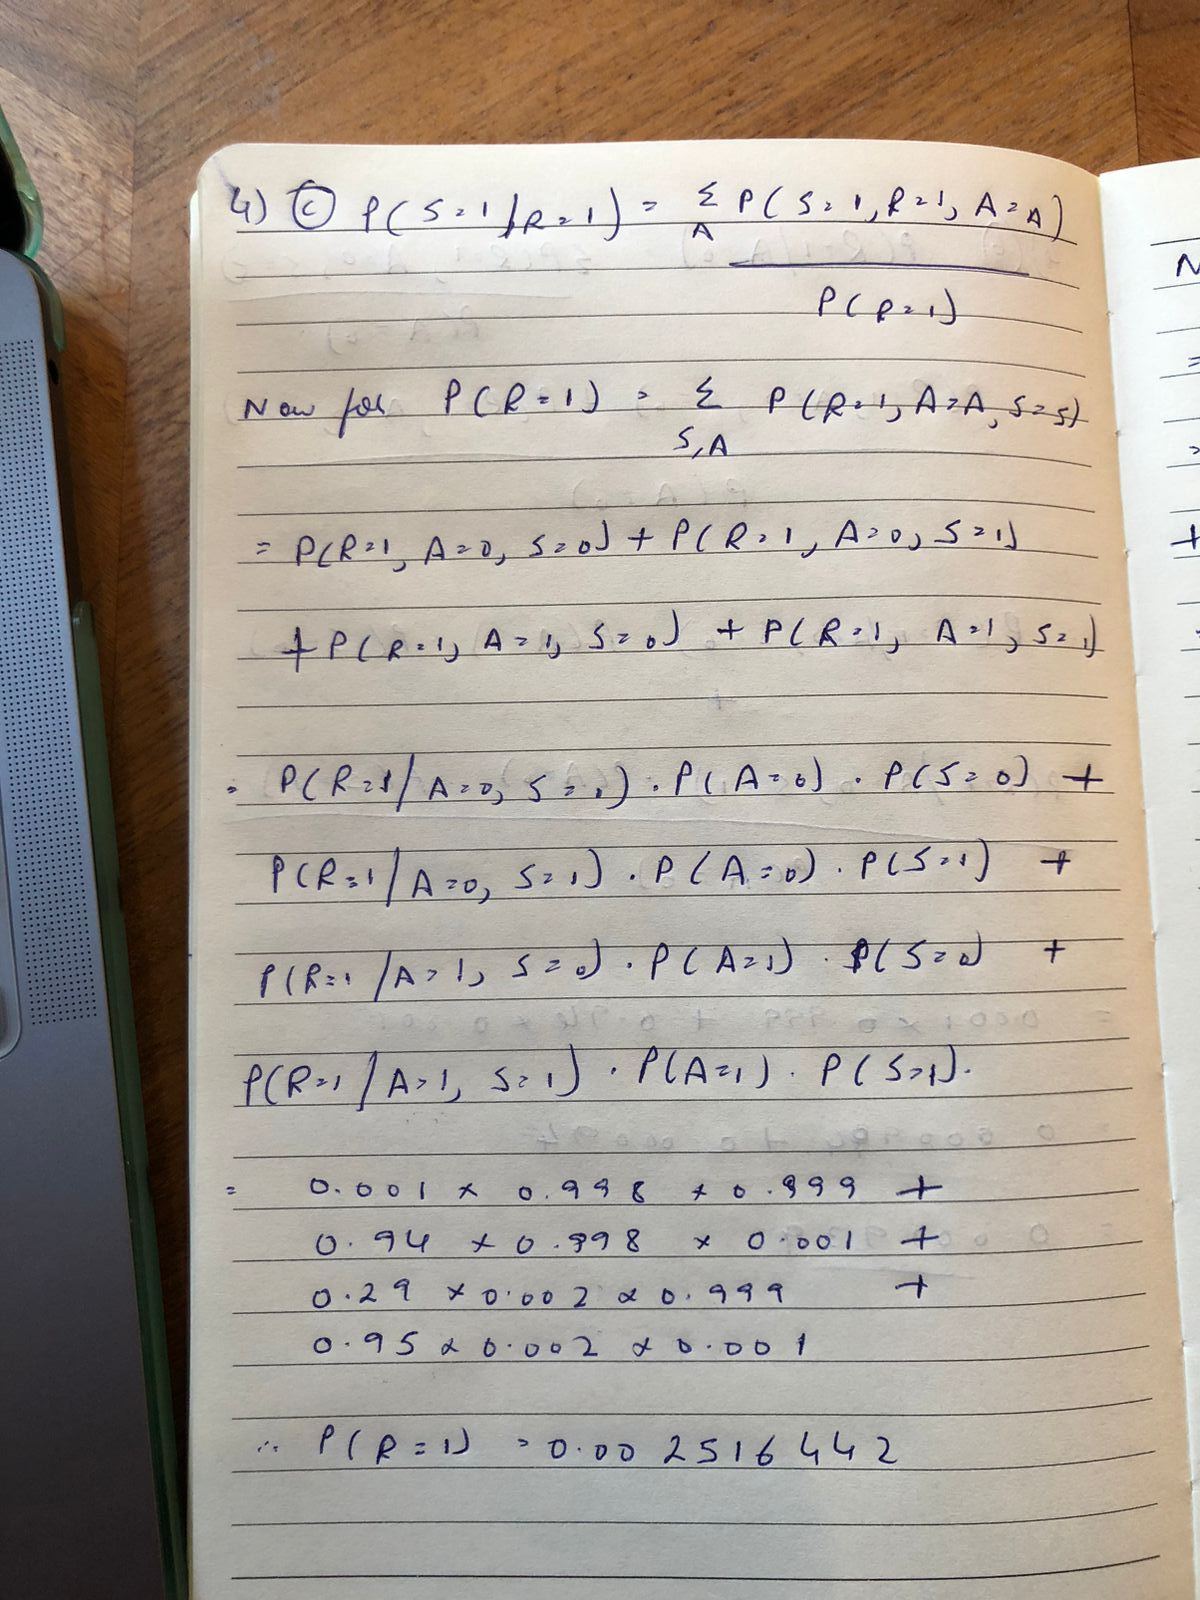

In [332]:
Image("/Users/sreekarl/Desktop/MSBA/Fall Semester/Advanced Machine Learning/Homework/HW 4/Images/Q4.C.jpeg")

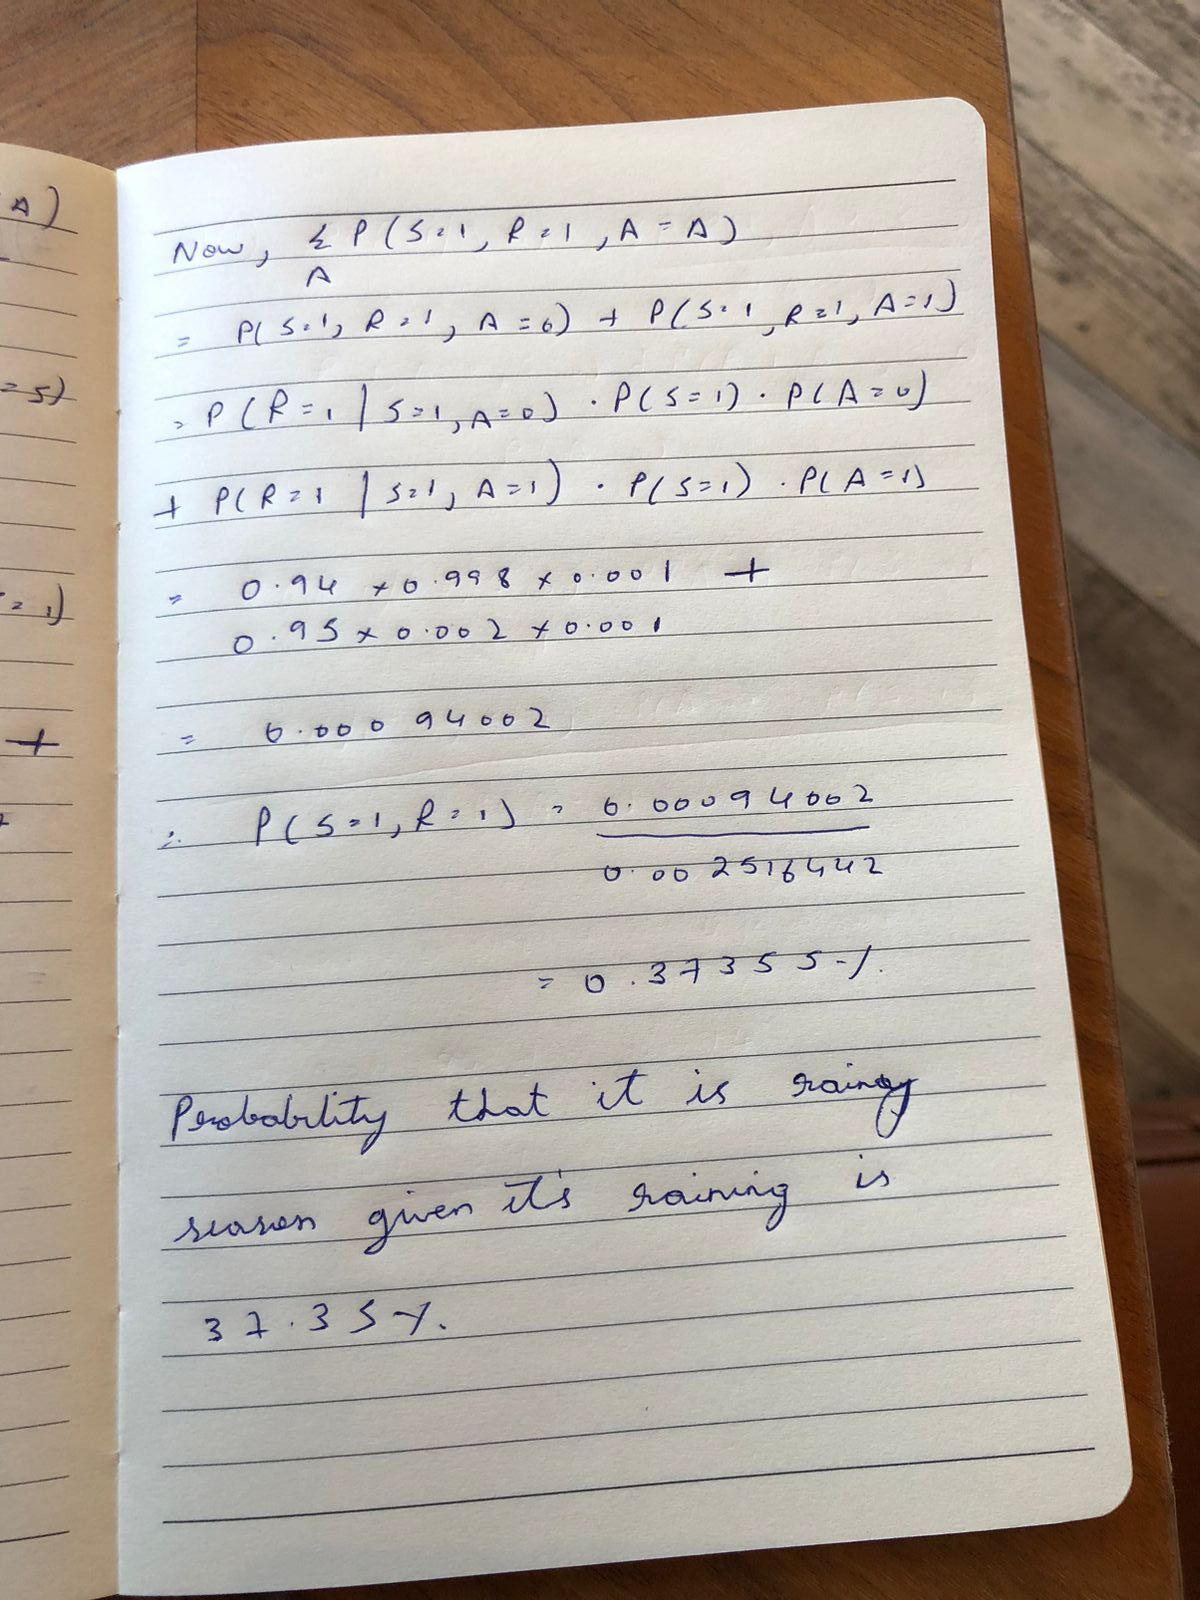

In [347]:
Image("/Users/sreekarl/Desktop/MSBA/Fall Semester/Advanced Machine Learning/Homework/HW 4/Images/Q4.C2.jpeg")

# Question 5: Support Vector Machines [10 pts]

1. [3 pts] Explain in what sense the Support Vector Machine seeks an optimal answer in the space of linear classifiers.
2. [3 pts] Describe how a slack variable works.
3. [4 pts] Explain how the SVM framework can be extended in order to provide non-linear decision boundaries.

### Part 1)
* SVM uses the maximal margin classifier where it tries to find the best hyperplane to divide the data. 
* This is a classifier that is farthest from the training observations. By computing the perpendicular distance between the hyperplane to the training obervations. The shortest such distance is called the margin. 
* The maximal margin hyperplane will be the hyperplane with the largest margin. 
* Additionally this classifier depends only on the obervations touching the margins. So if any other observation is changed that is not on the margin, the hyperplane remains unaffected.

### Part 2)
* The slack variable in SVM is analogous to the lambda term in regularization
* The slack variable is used to relax some constraints and allows certain training data points within the margin.
* It is added to the optimzation problem to maximize the margin as well as minimize violation of margin constraints.
* The number of data points within the margin must be as small as possible and the data points moving inside the margin must also be as small as possible.

### Part 3)
* SVM can use the 'kernel trick' for non-linear decision boundaries
* Some of the popular kernels are the polynomial and rbf (radial basis function) kernel
* A polynomial kernel is like a transformer used to generate new features by applying polynomial combination of the existing features
* The rbf kernel generates new features by measuring the distance between a specific data point and all other data points
* One example of rbf kernel is gaussian radial basis function